In [ ]:
import pandas as pd
import numpy as np
from funpymodeling.exploratory import freq_tbl
import matplotlib.pyplot as plt


In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [ ]:
#cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice
data= pd.read_excel("microretailer_mit_lift_lab.xlsx")
data

In [ ]:
data.info()


In [ ]:
pd.options.display.max_columns=None
data.head(5)

In [ ]:
filtro=data.iloc[ : , [1,3,9,10,11,12,13,15,20,21,22,23,25,27,31,34,35,36,86,87]]
filtro

In [ ]:
filtro.dtypes

In [ ]:
valores_nulos=filtro.isnull().sum()
valores_nulos

In [ ]:
data=filtro.copy()

In [ ]:
data["233_date_establishment"]=data["233_date_establishment"].fillna("sin registro")
data["2_current_permanent_employees"]=data["2_current_permanent_employees"].fillna("sin registro")
data["4_number_permanent_employees_last_year"]=data["4_number_permanent_employees_last_year"].fillna("sin registro")
data["5_change_store_space_last_year"]=data["5_change_store_space_last_year"].fillna("sin registro")
data["20_reviews_finances_monthly"]=data["20_reviews_finances_monthly"].fillna("sin registro")
data["18_sales_records"]=data["18_sales_records"].fillna("sin registro")
data["145_number_direct_competitors"]=data["145_number_direct_competitors"].fillna("sin registro")
data["186_internet_connection"]=data["186_internet_connection"].fillna("sin registro")
data["210_sales_channels"]=data["210_sales_channels"].fillna("sin registro")
data["189_payment_methods"]=data["189_payment_methods"].fillna("sin registro")
data["157_frequency_organize_shelves"]=data["157_frequency_organize_shelves"].fillna("sin registro")
data["158_charact_organize_products_on_shelves"]=data["158_charact_organize_products_on_shelves"].fillna("sin registro")








In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

In [ ]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data.iloc[ : , [6,9]]
Cuantitativas

,97_number_of_customers_in_store
0,2
1,0
2,0
3,0
4,0
...,...
166,1
167,1
168,3
169,0


In [ ]:
#Filtro para obtener variables cualitativas
Cualitativas=data.iloc[ : , [0,2,3,4,5,7,8,11,12,13,15,16,17,18,19]]
Cualitativas

,_title,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,233_date_establishment,5_change_store_space_last_year,20_reviews_finances_monthly,18_sales_records,186_internet_connection,210_sales_channels,189_payment_methods,157_frequency_organize_shelves,158_charact_organize_products_on_shelves
0,"November 12, 2022",Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,2021-04-12,No cambió,yes,Software especializado + computadora,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes..."
1,"November 12, 2022",Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),2012-08-12,Aumentó 15%,yes,No lo hago,yes,WhatsApp,"Efectivo,Transferencia interbancaria",sin registro,"Categoría (e.g. limpieza, aseo personal, comes..."
2,"November 12, 2022",Grocery store (aka. nanostore),yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",2022-08-12,No cambió,yes,Software especializado + computadora,yes,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes..."
3,"November 12, 2022",Grocery store (aka. nanostore),no,no,no,POS system (i.e. computer + bar code scanner +...,2008-11-12,No cambió,yes,Software especializado + computadora,yes,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes..."
4,"November 12, 2022",Grocery store (aka. nanostore),yes,no,no,Smartphone,2007-10-12,No cambió,yes,En papel,yes,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Mensualmente,Venta cruzada (e.g. cereal + leche)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro
167,"November 3, 2022",Grocery store (aka. nanostore),no,no,no,"Analog cash register,Smartphone",sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro
168,"November 3, 2022",Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro
169,"November 3, 2022",Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro


<Figure size 1500x800 with 0 Axes>

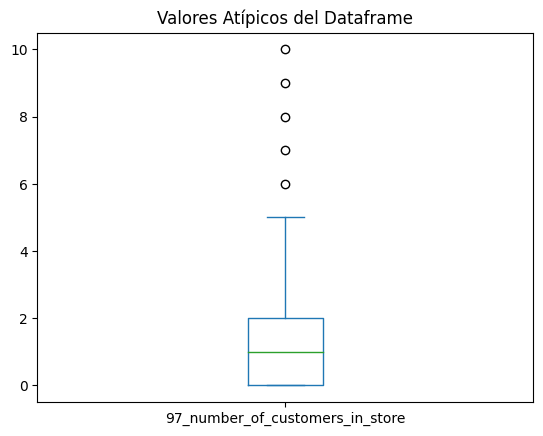

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(15, 8))
Cuantitativas.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
y=Cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 97_number_of_customers_in_store    6.591777
dtype: float64
Limite inferior permitido 97_number_of_customers_in_store   -3.808151
dtype: float64


In [ ]:
Datos_sin_Outliers= Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

,97_number_of_customers_in_store
0,2.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
166,1.0
167,1.0
168,3.0
169,0.0


In [ ]:
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

97_number_of_customers_in_store    4
dtype: int64

In [ ]:
data_clean=Datos_sin_Outliers.copy()
data_clean=data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

,97_number_of_customers_in_store
0,2.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
166,1.0
167,1.0
168,3.0
169,0.0


In [ ]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

97_number_of_customers_in_store    0
dtype: int64

In [ ]:
Dataframe_final = pd.concat([Cualitativas, data_clean], axis=1)
Dataframe_final

<Axes: ylabel='frequency'>

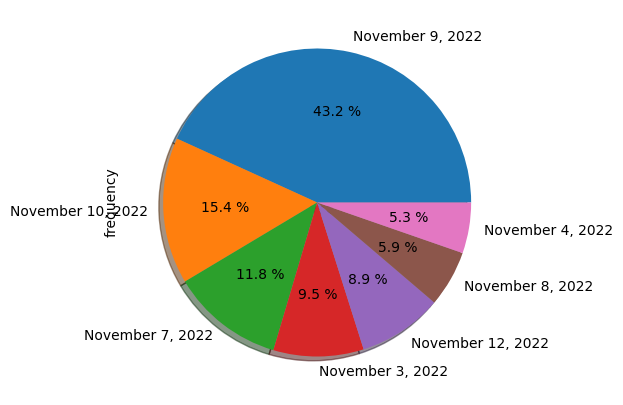

In [ ]:
#Graficamos
table= freq_tbl(Dataframe_final['_title'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('_title')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

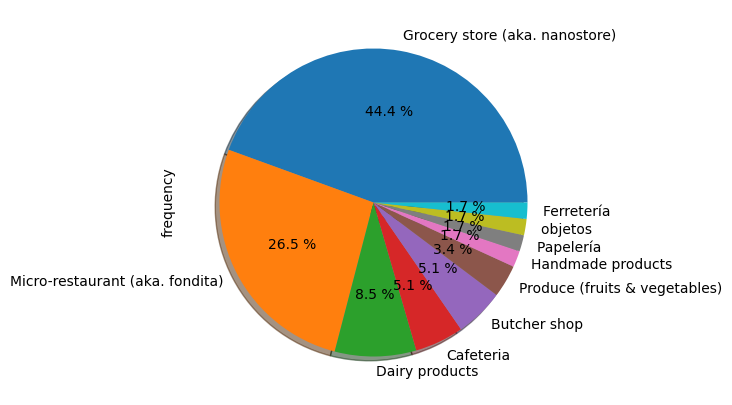

In [ ]:

table= freq_tbl(Dataframe_final['232_type_of_store'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('232_type_of_store')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

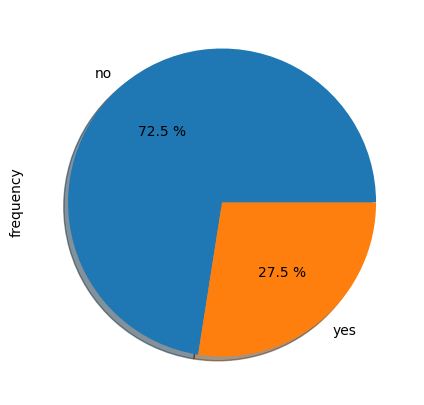

In [ ]:

table= freq_tbl(Dataframe_final['108_does_the_micro_retailer_has_a_barred_window_'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('108_does_the_micro_retailer_has_a_barred_window_')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

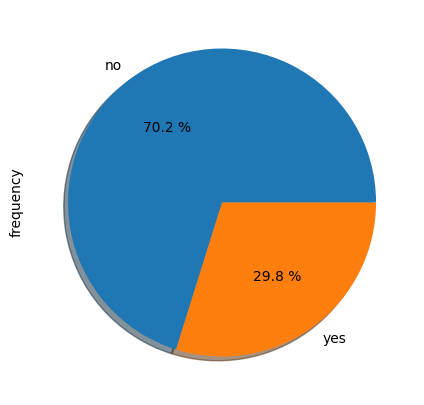

In [ ]:
table= freq_tbl(Dataframe_final['99_does_the_micro_retailer_exhibits_products_outside_'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

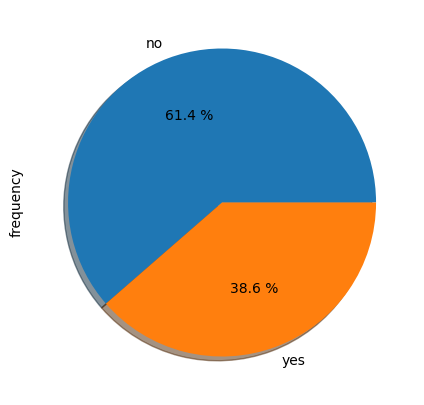

In [ ]:
table= freq_tbl(Dataframe_final['102_does_the_micro_retailer_sells_fresh_products_'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

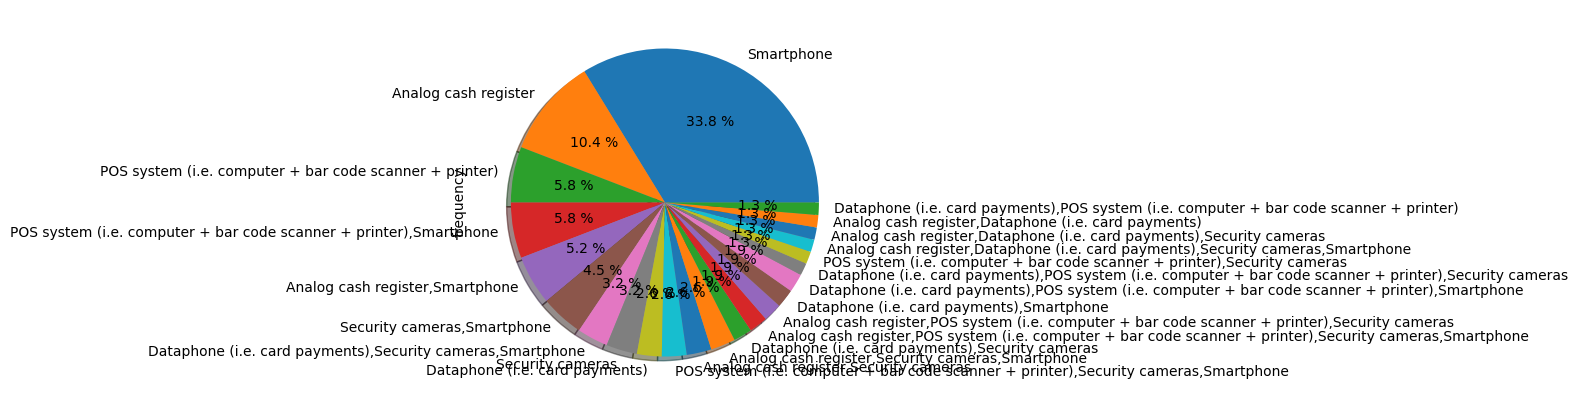

In [ ]:

table= freq_tbl(Dataframe_final['184_store_devices'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('184_store_devices')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

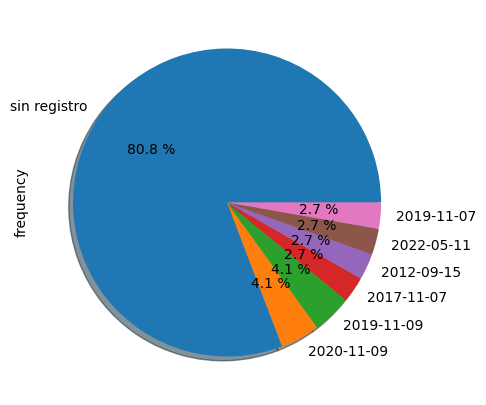

In [ ]:
table= freq_tbl(Dataframe_final['233_date_establishment'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('233_date_establishment')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

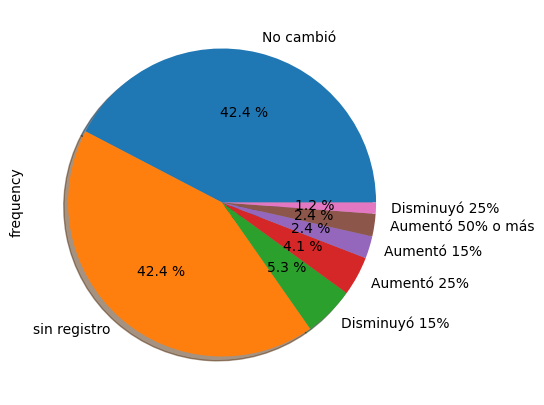

In [ ]:
table= freq_tbl(Dataframe_final['5_change_store_space_last_year'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('5_change_store_space_last_year')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

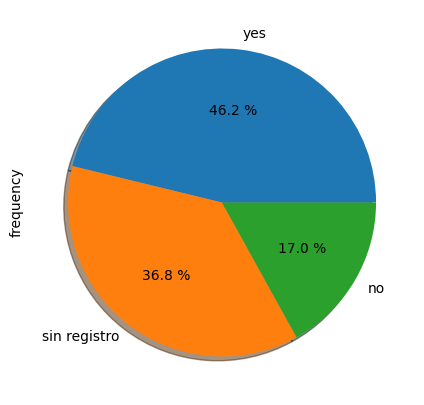

In [ ]:
table= freq_tbl(Dataframe_final['20_reviews_finances_monthly'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('20_reviews_finances_monthly')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

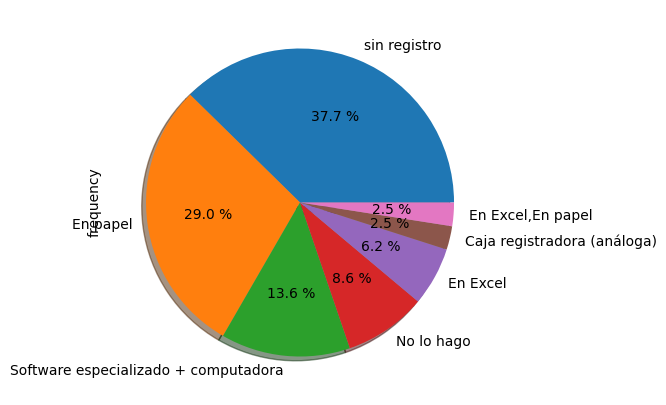

In [ ]:
table= freq_tbl(Dataframe_final['18_sales_records'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('18_sales_records')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

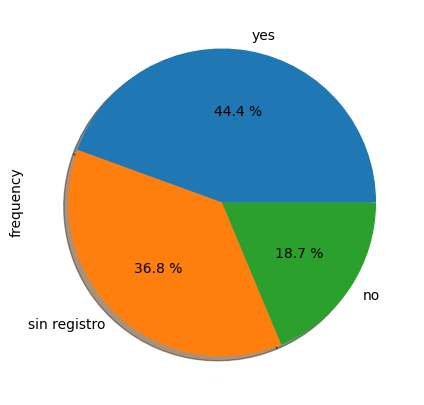

In [ ]:
table= freq_tbl(Dataframe_final['186_internet_connection'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('186_internet_connection')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

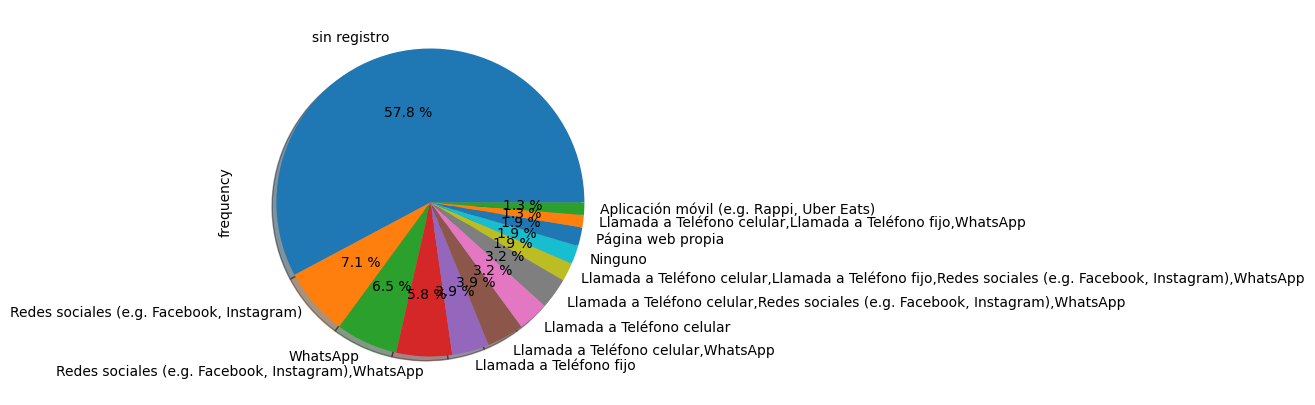

In [ ]:
table= freq_tbl(Dataframe_final['210_sales_channels'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('210_sales_channels')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

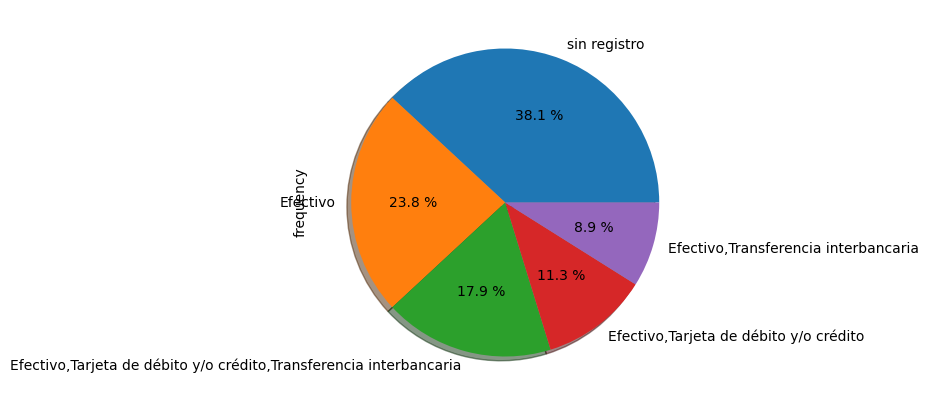

In [ ]:
table= freq_tbl(Dataframe_final['189_payment_methods'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('189_payment_methods')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

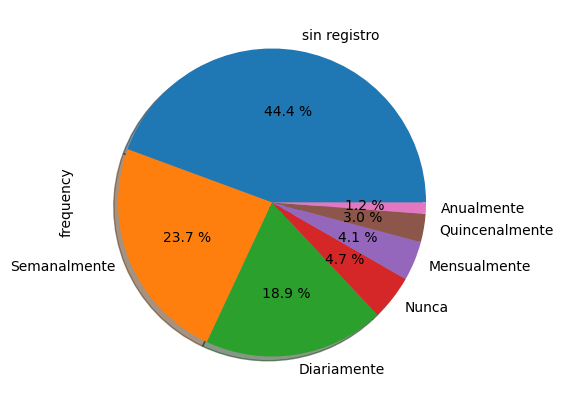

In [ ]:
table= freq_tbl(Dataframe_final['157_frequency_organize_shelves'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('157_frequency_organize_shelves')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

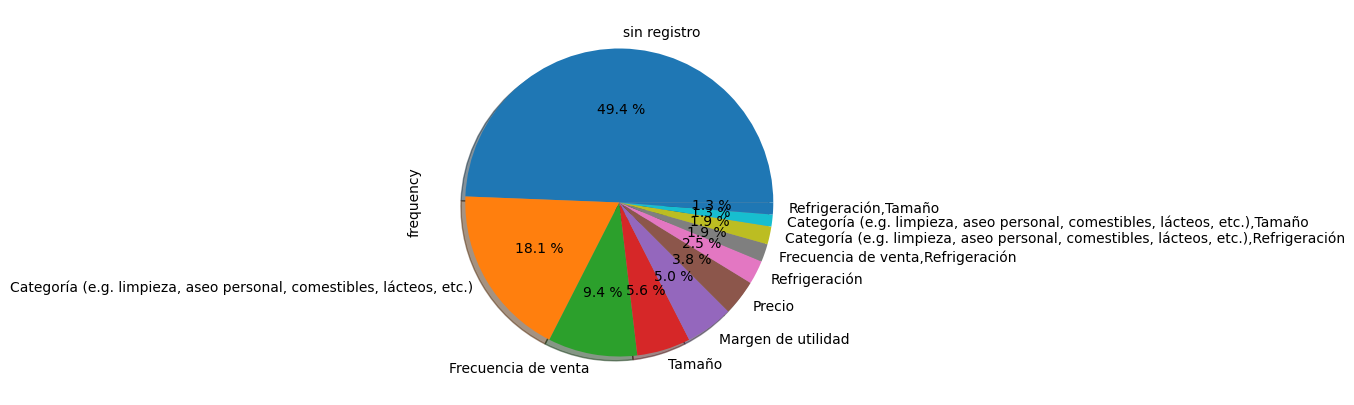

In [ ]:
table= freq_tbl(Dataframe_final['158_charact_organize_products_on_shelves'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('158_charact_organize_products_on_shelves')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
